In [56]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Usuario\.cache\kagglehub\datasets\rabieelkharoua\alzheimers-disease-dataset\versions\1


In [57]:
df = pd.read_csv(path + "/alzheimers_disease_data.csv")
df.shape
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [58]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [59]:
df.isna().sum() #Muestra la cantidad de valores nulos en cada columna

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [ ]:
from sklearn.model_selection import train_test_split

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.drop(["patientid", "doctorincharge"], axis = 1, inplace=True) #Eliminar la columna del resultado

X_train, X_val = train_test_split(df, test_size=0.2, random_state=1)
X_train, X_test = train_test_split(X_train, test_size=0.2, random_state=11)

y_train = X_train["diagnosis"].values
X_train.drop(["diagnosis"],inplace=True,axis = 1)

y_val = X_test["diagnosis"].values
X_test.drop(["diagnosis"],inplace=True,axis = 1)

y_test = X_val["diagnosis"].values
X_val.drop(["diagnosis"],inplace=True,axis = 1)

print(f"{X_train.shape[0]} muestras de entrenamiento")
print(f"{X_test.shape[0]} muestras de validación")
print(f"{X_val.shape[0]} muestras de prueba")

1375 muestras de entrenamiento
344 muestras de validación
430 muestras de prueba


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X_train.select_dtypes(include=np.number).columns
print(num_cols)

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
    ]
)
print(preprocessor)

Index(['age', 'gender', 'ethnicity', 'educationlevel', 'bmi', 'smoking',
       'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality',
       'familyhistoryalzheimers', 'cardiovasculardisease', 'diabetes',
       'depression', 'headinjury', 'hypertension', 'systolicbp', 'diastolicbp',
       'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl',
       'cholesteroltriglycerides', 'mmse', 'functionalassessment',
       'memorycomplaints', 'behavioralproblems', 'adl', 'confusion',
       'disorientation', 'personalitychanges', 'difficultycompletingtasks',
       'forgetfulness'],
      dtype='object')
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'gender', 'ethnicity', 'educationlevel', 'bmi', 'smoking',
       'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality',
       'familyhistoryalzheimers', 'cardiovasculardisease', 'diabete

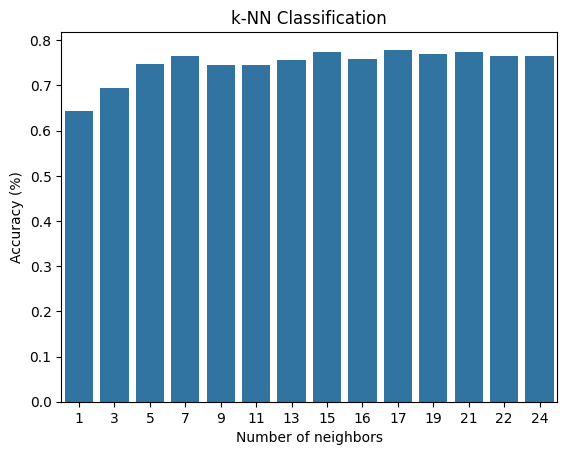

In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15,16,17,19,21,22,24]
accuracy = []

for k in n_neighbors:
  clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  accuracy.append(clf.score(X_test, y_val))

gfg = sns.barplot(x = n_neighbors,y = accuracy)
gfg.set(xlabel ="Number of neighbors", ylabel = "Accuracy (%)", title ='k-NN Classification')
plt.show()


In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(accuracy)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train = pd.concat([X_train,X_test],axis=0)
y_train = np.hstack([y_train,y_val])

El número óptimo de vecinos es 17


In [ ]:
# Entrenar el clasificador con los datos de entrenamiento
clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=k_opt))])
clf.fit(X_train, y_train)
#Validar el rendimiento del clasificador con los datos de prueba
accuracy = clf.score(X_val, y_test)

print(f"La tasa de acierto de clasificación en el conjunto de test es {accuracy:0.2f}")

La tasa de acierto de clasificación en el conjunto de test es 0.74


In [ ]:
print(clf.predict(X_val.iloc[[0],:]))
print(y_test[0])

[0]
0


In [ ]:
print(X_val.iloc[[0], :])

      age  gender  ethnicity  educationlevel        bmi  smoking  \
1146   62       0          0               1  37.410003        0   

      alcoholconsumption  physicalactivity  dietquality  sleepquality  ...  \
1146           19.920387          1.639385     8.910941      4.037647  ...   

           mmse  functionalassessment  memorycomplaints  behavioralproblems  \
1146  27.741768              5.286593                 0                   0   

           adl  confusion  disorientation  personalitychanges  \
1146  1.976559          1               0                   0   

      difficultycompletingtasks  forgetfulness  
1146                          0              0  

[1 rows x 32 columns]


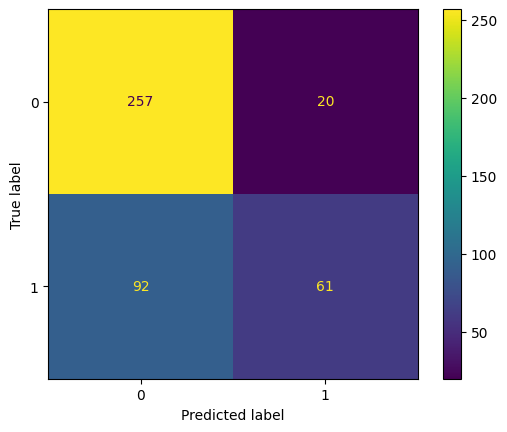

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

cm = confusion_matrix(y_test,clf.predict(X_val))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       277
           1       0.75      0.40      0.52       153

    accuracy                           0.74       430
   macro avg       0.74      0.66      0.67       430
weighted avg       0.74      0.74      0.71       430

